# Math 465 - High Dimensional Data

Things to implement
- PCA
- Multidimensional Scaling
- Isomap
- Multiplication by a random matrix i.e. Johnson Lindenstrauss
- Compressed Sensing
- Kmeans clustering
- Spectral clustering
- Hierarchical clustering
- Page Rank



Helper functions
- Get the eigenvalues and eigenvectors of a matrix
- 

Helper classes
- Vector
- 

In [3]:
import numpy as np
from numpy.linalg import norm 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
matplotlib.style.use('seaborn')

## Principal Component Analysis

In [3]:
A = np.random.randn(10,10)
v = np.random.randn(10,1)
w = np.random.randn(10,1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11de58940>,
      dtype=object)

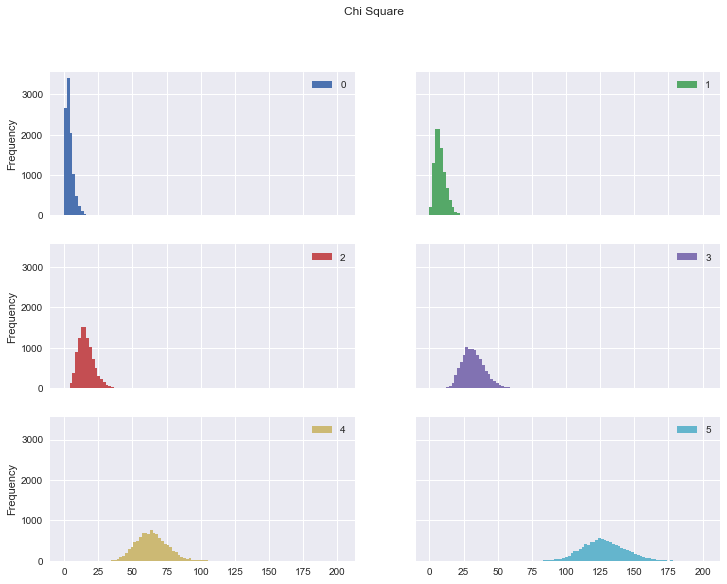

In [17]:
(pd.DataFrame([[norm(np.random.randn(p,1))**2 for _ in range(10000)] for p in [2**i for i in range(2,8)]]).T
 .plot.hist(bins=100, subplots=True, layout=(-1,2), figsize=(12,9), title='Chi Square', sharey=True)
)


## Spectral Clustering

Original Network:
[[0. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1.]
 [0. 1. 0. 1. 0.]
 [1. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]




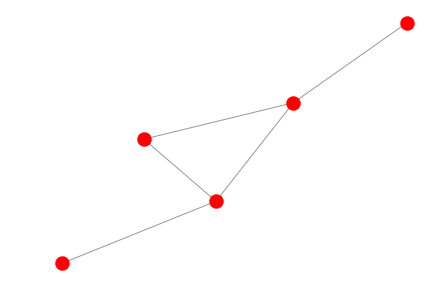

In [43]:
size = 5
sparsity = 0.15
#A = np.ceil(sp.sparse.rand(size, size, sparsity).todense())
G = nx.generators.erdos_renyi_graph(size, 0.4)
A = nx.to_numpy_matrix(G)
print('Original Network:')
print(A.round(3))
print('\n')
# Plotting
# Plot convergence
fig1, ax = plt.subplots(1,1,figsize=(7,5))
pos = nx.layout.spring_layout(G, iterations=10)
nx.draw_networkx_nodes(G, pos, node_color='Red', ax=ax, node_size=200)
nx.draw_networkx_edges(G, pos, node_size=200, alpha=0.4,
                       arrowsize=15, width=1, ax=ax)
ax.set_axis_off()
plt.show()

In [77]:
A = nx.to_numpy_matrix(G, weight=1)
L = nx.laplacian_matrix(G).todense()
D = np.diag(np.diag(L))
print(A)
print(L)
print(Lsym)
Lsym = nx.normalized_laplacian_matrix(G).todense().round(2)

[[0. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1.]
 [0. 1. 0. 1. 0.]
 [1. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]
[[ 1  0  0 -1  0]
 [ 0  3 -1 -1 -1]
 [ 0 -1  2 -1  0]
 [-1 -1 -1  3  0]
 [ 0 -1  0  0  1]]
[[ 1.    0.    0.   -0.58  0.  ]
 [ 0.    1.   -0.41 -0.33 -0.58]
 [ 0.   -0.41  1.   -0.41  0.  ]
 [-0.58 -0.33 -0.41  1.    0.  ]
 [ 0.   -0.58  0.    0.    1.  ]]


array([ 0.42, -0.32,  0.18, -0.32,  0.42])

In [94]:
print(np.linalg.inv(D))
print(np.sqrt(np.linalg.inv(D)) @ L @ np.sqrt(np.linalg.inv(D)))
(np.linalg.inv(D) @ L).round(3)
print()

[[ 1.          0.          0.          0.          0.        ]
 [ 0.          0.33333333  0.          0.          0.        ]
 [ 0.          0.          0.5         0.          0.        ]
 [-0.         -0.         -0.          0.33333333 -0.        ]
 [ 0.          0.          0.          0.          1.        ]]
[[ 1.          0.          0.         -0.57735027  0.        ]
 [ 0.          1.         -0.40824829 -0.33333333 -0.57735027]
 [ 0.         -0.40824829  1.         -0.40824829  0.        ]
 [-0.57735027 -0.33333333 -0.40824829  1.          0.        ]
 [ 0.         -0.57735027  0.          0.          1.        ]]



In [45]:
print(nx.laplacian_spectrum(G).round(2))
plt.plot(nx.laplacian_spectrum(G))

matrix([[ 1,  0,  0, -1,  0],
        [ 0,  3, -1, -1, -1],
        [ 0, -1,  2, -1,  0],
        [-1, -1, -1,  3,  0],
        [ 0, -1,  0,  0,  1]], dtype=int64)

In [111]:
eigvals, eigvects = (x.round(3) for x in np.linalg.eig(L))
eigvals
eigvects

array([[ 0.205,  0.195,  0.447,  0.512, -0.677],
       [ 0.677, -0.512,  0.447, -0.195,  0.205],
       [-0.   ,  0.632,  0.447, -0.632,  0.   ],
       [-0.677, -0.512,  0.447, -0.195, -0.205],
       [-0.205,  0.195,  0.447,  0.512,  0.677]])

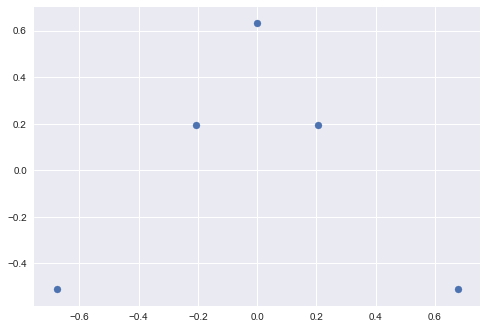

In [113]:
plt.scatter(eigvects[:,0], eigvects[:,1] )